In [1]:
import cira 
import pandas as pd 
from datetime import datetime
from os.path import exists

cira.auth.KEY_FILE = "../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

SYMBOL = "MSFT"
SYM_HIST_FILE = f"./{SYMBOL}.csv"

stk = cira.Stock(SYMBOL)

if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2015, 7, 1)
    end = datetime(2023, 7, 1)
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,MSFT,48.18,48.61,47.36,48.61,59379610.0,272783.0,48.05
2016-01-05 05:00:00+00:00,MSFT,48.72,49.13,48.38,48.83,36457804.0,180639.0,48.83
2016-01-06 05:00:00+00:00,MSFT,48.18,48.25,47.58,47.94,41899187.0,225858.0,47.99
2016-01-07 05:00:00+00:00,MSFT,46.75,47.44,46.19,46.28,61897908.0,303273.0,46.64
2016-01-08 05:00:00+00:00,MSFT,46.45,47.26,46.26,46.42,52260304.0,261924.0,46.74


   timestamp  fedfunds
0 1954-07-01      0.80
1 1954-08-01      1.22
2 1954-09-01      1.07
3 1954-10-01      0.85
4 1954-11-01      0.83


<Axes: >

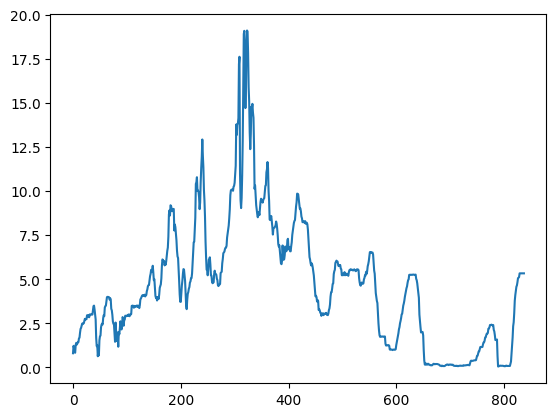

In [15]:
fed = pd.read_csv("./FEDFUNDS.csv")
fed["timestamp"] = pd.to_datetime(fed["timestamp"])
fed.set_index(keys=["timestamp"])
print(fed.head())
fed["fedfunds"].plot()

In [11]:
start = datetime(2015, 7, 1)
data["fed"] = fed["fedfunds"][fed["timestamp"] > start]
data["fed"]

timestamp
2016-01-04 05:00:00+00:00   NaN
2016-01-05 05:00:00+00:00   NaN
2016-01-06 05:00:00+00:00   NaN
2016-01-07 05:00:00+00:00   NaN
2016-01-08 05:00:00+00:00   NaN
                             ..
2023-06-26 04:00:00+00:00   NaN
2023-06-27 04:00:00+00:00   NaN
2023-06-28 04:00:00+00:00   NaN
2023-06-29 04:00:00+00:00   NaN
2023-06-30 04:00:00+00:00   NaN
Name: fed, Length: 1886, dtype: float64